In [ ]:
#notes
# no unique identifier .. therefore cant remove duplicates

In [1]:
# Start With Data dictonary and explore ideas (good 'ol pen and paper) 
# Planning 
  # VAlIDATION
    # Data range? cross sectional data                    ✓
    # Right Data? yes                                     ✓
    # Unique Identifier? No unique identifier!            ✓
    # Duplicates?! cant .. no id                          ✓
# Understand nature of the data .info() .describe() report✓
# Barplots, heatmaps, boxplots                            ✓
# Missing data                                            ✓
# Correlation between the metrics                         ✓
# normalize data / class imbalance?                       ✓
# Outliers                                                ✓
# Explore interesting themes 
    # Male Vs. Female
    # Higher Education level
    # Country of origin 
    # Race effect!
# Feature engineering 
# preprocess data together / pipeline ✓
    # use label for train and test    ✓
# Scaling?                            ✓

# Model Baseline      : 75% if predict all <50k     
# Model comparison with CV            ✓

In [8]:
import pandas as pd
import pandas_profiling as prof
import numpy as np


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [12]:
#import ML libraries
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
df = pd.read_csv (r'C:\Users\HP\Downloads\e_dataset.csv')
df

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


## Quick reporting tool for EDA

In [90]:
#may not appear when sent
import pandas_profiling as prof
prof.ProfileReport(df, title='Downloads')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#data bias 
    # male/ female
    # income imbalance 
    # capital gain capped at 99999, working hours at 99

# EDA

In [ ]:
#notes:
# moderate correlation between income and other features.. but could be due to multiple level features
# many zero values from capital columns (remove) 
# multicollinearity bwn education lvl and num, martial status and relationship (keep and feature selection)
# class imbalance

In [6]:
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
df['education_level'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [8]:
#quick data validation
df[(df['relationship']==' Wife')&(df['sex']!=' Female')]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
530,29,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Wife,White,Male,0.0,0.0,40.0,United-States,>50K


In [9]:
df.describe(include='all')

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222.000000,45222,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,34014
mean,38.547941,NaN,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
#capital gain capped at 99999

## capital gain and loss columns contain more than 90% zeros
#### will try adding and removing them from model and check performance

In [91]:
df[df['capital-gain'] > 0].describe(include='all')

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,3790.000000,3790,3790,3790.000000,3790,3790,3790,3790,3790,3790.000000,3790.0,3790.000000,3790,3790
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,38,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,>50K
freq,NaN,2538,964,NaN,2520,808,2242,3375,2939,NaN,NaN,NaN,3526,2375
mean,43.664644,NaN,NaN,11.093668,NaN,NaN,NaN,NaN,NaN,13142.185488,0.0,44.002902,NaN,NaN
std,12.916268,NaN,NaN,2.650572,NaN,NaN,NaN,NaN,NaN,22676.003955,0.0,11.925242,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,114.000000,0.0,2.000000,NaN,NaN
25%,34.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,3464.000000,0.0,40.000000,NaN,NaN
50%,42.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,7298.000000,0.0,40.000000,NaN,NaN
75%,52.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,14084.000000,0.0,50.000000,NaN,NaN


No handles with labels found to put in legend.


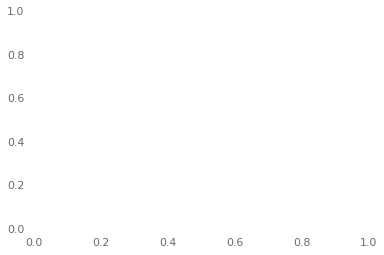

In [151]:
#viz format
sns.set(font='DejaVu Sans',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})
plt.legend(frameon=False)
sns.despine(left=True, bottom=True)
sns.set_palette('Paired',10)

# Correlation between independent features and target 

In [43]:
temp_features = [x for x in df.columns ]
import phik

interval columns not set, guessing: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


<ipython-input-45-7cf3fbb3e0a8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


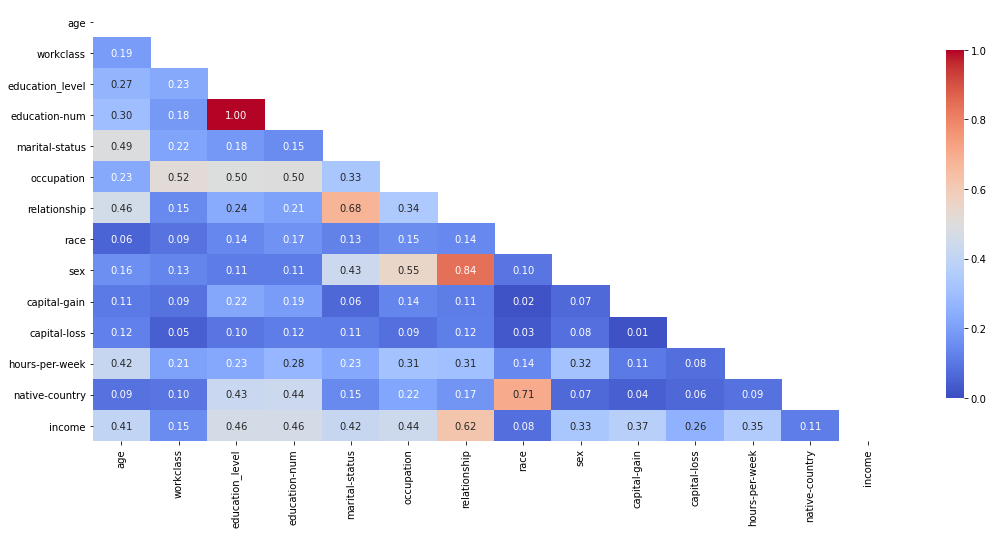

In [45]:
corr = df[temp_features].phik_matrix()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(18,8))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1);

### as expected, education perfect corr with education level, and race highly correlated with country
### notice also moderate correlation of income with fearures like age, education, and mostly realtionship.

In [20]:
# df = df.drop(['capital-loss','capital-gain'], axis=1)
# df

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40.0,United-States,<=50K


### Class imbalance, income <=50k is 3x as much

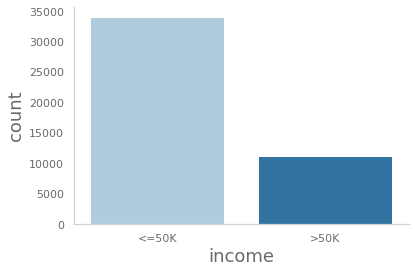

In [52]:
sns.countplot(x="income" ,dodge=True,data=df);

In [12]:
# probability of predictiting true if predicting all <50 -baseline-
100 * sum(df['income'] == '<=50K') / len(df)

75.21560302507629

In [148]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_columns = [col for col in df.columns if (df[col].dtype in numerics) & (col not in ['capital-gain', 'capital-loss'])  ]
num_columns

['age', 'education-num', 'hours-per-week']

In [149]:
#red is less than 50k income
df['income'].unique()[0]

'<=50K'

## Ages for different income groups are very different
## Less working hours have a lower income percentage
## Higher education level are more skewed towards higher pay

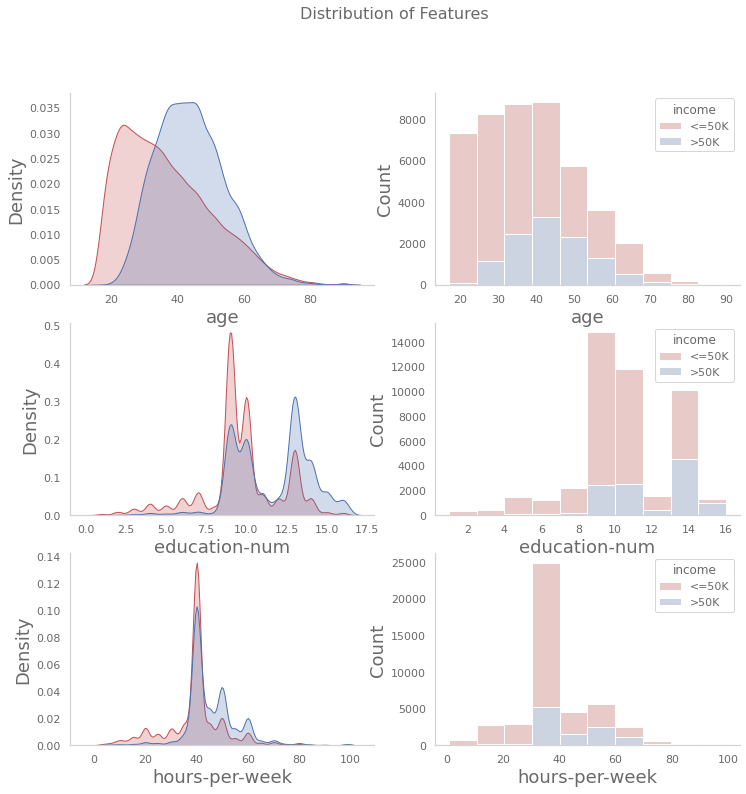

In [165]:
num_rows, num_cols = 3,2
f, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))
f.suptitle('Distribution of Features', fontsize=16)

for index, column in enumerate(num_columns):
    i,j = (index // num_cols, index % num_cols)
    sns.kdeplot(df.loc[df['income'] == df['income'].unique()[0], column], color="r", shade=True, ax=axes[index,0])
    sns.kdeplot(df.loc[df['income'] == df['income'].unique()[1], column], color="b", shade=True, ax=axes[index,0])
    sns.histplot(data=df,x=column,hue='income', kde=False, palette='vlag_r', bins=10, ax=axes[index,1],multiple='stack')

In [21]:
#working hours per week capped at 99hrs
df[df['hours-per-week'] > 90]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
251,50,Self-emp-not-inc,Masters,14.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407.0,0.0,98.0,United-States,<=50K
860,37,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,99.0,United-States,>50K
1079,25,Private,Masters,14.0,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0.0,0.0,99.0,United-States,>50K
1735,55,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,99.0,United-States,>50K
2682,63,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,98.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42118,60,Private,HS-grad,9.0,Divorced,Priv-house-serv,Unmarried,White,Female,0.0,0.0,99.0,United-States,<=50K
42507,52,Self-emp-not-inc,HS-grad,9.0,Divorced,Exec-managerial,Unmarried,White,Female,0.0,0.0,99.0,United-States,>50K
42545,42,Self-emp-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,99.0,United-States,>50K
44230,48,Private,HS-grad,9.0,Married-civ-spouse,Transport-moving,Husband,Black,Male,0.0,0.0,99.0,United-States,<=50K


## 88% out of women have lower income compared to 68% for men !

In [22]:
pd.crosstab(df.sex, df.income, normalize='index')

income,<=50K,>50K
sex,,
Female,0.886424,0.113576
Male,0.687523,0.312477


## White and asian races have significantly higher income compared to other races

In [23]:
pd.crosstab(df.race, df.income, normalize='index') * 100.0

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,87.816092,12.183908
Asian-Pac-Islander,71.680737,28.319263
Black,87.369915,12.630085
Other,87.252125,12.747875
White,73.762949,26.237051


## Higher education insures better income as shown

<AxesSubplot:xlabel='education_level', ylabel='count'>

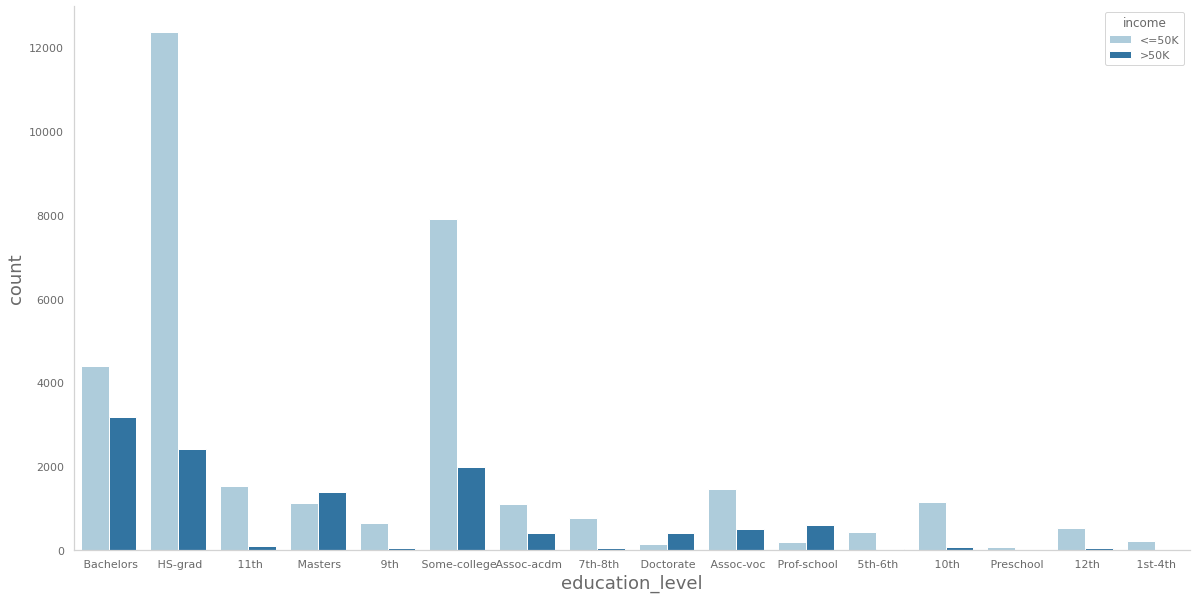

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(x="education_level",hue='income' ,dodge=True,data=df)

## Multiple features could be related
### i.e there could be sample bias in a certain group or ethinicaty
### there could me multiple simpson paradoxs due to multiple dependant features
### therefore a ML model would capture these patterns
## P.S watch out for class imbalance!

In [13]:
#numeric and categorical columns

## Create data handling pipeline

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_columns = [col for col in df.columns if (df[col].dtype in numerics)   ]
num_columns

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [15]:
cat_columns = [col for col in df.columns if (df[col].dtype not in numerics and col != 'income') ]
cat_columns

['workclass',
 'education_level',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [16]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [17]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown ='ignore')),
    ])

In [18]:
num_attribs = num_columns
cat_attribs = cat_columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)],
        
    )

In [19]:
train = full_pipeline.fit_transform(df)
train.shape

(45222, 103)

In [42]:
df.iloc[:,:-1]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States


In [20]:
#get columns function
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []

    for transformer_in_columns in column_transformer.transformers_[:-1]: #the last transformer is ColumnTransformer's 'remainder'
        #print('\n\ntransformer: ', transformer_in_columns[0])
        
        raw_col_name = list(transformer_in_columns[2])
        
        if isinstance(transformer_in_columns[1], Pipeline): 
            # if pipeline, get the last transformer
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
            
        try:
          if isinstance(transformer, OneHotEncoder):
            names = list(transformer.get_feature_names(raw_col_name))
            
          elif isinstance(transformer, SimpleImputer) and transformer.add_indicator:
            missing_indicator_indices = transformer.indicator_.features_
            missing_indicators = [raw_col_name[idx] + '_missing_flag' for idx in missing_indicator_indices]

            names = raw_col_name + missing_indicators
            
          else:
            names = list(transformer.get_feature_names())
          
        except AttributeError as error:
          names = raw_col_name
        
        #print(names)    
        
        col_name.extend(names)
            
    return col_name
a = get_column_names_from_ColumnTransformer(full_pipeline)

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
pd.get_dummies(df.iloc[:,:-1], drop_first=True).columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'education_level_ 11th', 'education_level_ 12th',
       'education_level_ 1st-4th', 'education_level_ 5th-6th',
       'education_level_ 7th-8th', 'education_level_ 9th',
       'education_level_ Assoc-acdm', 'education_level_ Assoc-voc',
       'education_level_ Bachelors', 'education_level_ Doctorate',
       'education_level_ HS-grad', 'education_level_ Masters',
       'education_level_ Preschool', 'education_level_ Prof-school',
       'education_level_ Some-college', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Armed-Forces

In [79]:
100 * df['income'].value_counts() / len(df['income']) 

<=50K    75.215603
>50K     24.784397
Name: income, dtype: float64

In [22]:
y = df['income'].apply(lambda x: 1 if x == '<=50K' else 0)

## Since dataset isnt large, cross-validating the model accuracy would be best option
### Start with using Random forest classifer

In [93]:
kf =  StratifiedKFold(4, shuffle=True, random_state=1)

In [40]:
# with income
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,train, y, cv=4)
cv, cv.mean()

(array([0.83981956, 0.84786839, 0.84298983, 0.8377709 ]), 0.8421121696604755)

In [88]:
# with income, f1 score
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,train, y,scoring="f1", cv=kf)
cv, cv.mean()

(array([0.8975464 , 0.89276403, 0.90039795, 0.89657169]), 0.896820018676322)

In [89]:
# with income, f1 score, balanced
rf = RandomForestClassifier(random_state = 1,class_weight='balanced')
cv = cross_val_score(rf,train, y,scoring="f1", cv=kf)
cv, cv.mean()

(array([0.8934512 , 0.88630354, 0.89717119, 0.89343783]), 0.8925909407320106)

## using smote didnt increase f1 score, as data is highly imbalanced causing redundancy problems, could try to limit resampling to a threshold later on

In [34]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_smote, y_smote,scoring="f1", cv=4)
cv, cv.mean()

(array([0.8355014 , 0.88022646, 0.9026767 , 0.90228536]), 0.8801724788180115)

In [145]:
rf.fit(train, y)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [146]:
feature_scores = pd.Series(rf.feature_importances_, index=a).sort_values(ascending=False)

feature_scores[0:10]

age                                   0.223073
hours-per-week                        0.106136
marital-status_ Married-civ-spouse    0.084875
capital-gain                          0.078824
relationship_ Husband                 0.070560
education-num                         0.064844
marital-status_ Never-married         0.041552
capital-loss                          0.026269
occupation_ Exec-managerial           0.016089
relationship_ Own-child               0.013839
dtype: float64

### furthur investigate on important features 

In [182]:
pd.crosstab(df['relationship'], df.income, normalize='index') * 100.0

income,<=50K,>50K
relationship,,
Husband,54.425158,45.574842
Not-in-family,89.506067,10.493933
Other-relative,96.293551,3.706449
Own-child,98.415334,1.584666
Unmarried,93.692565,6.307435
Wife,51.410808,48.589192


In [184]:
df[df['relationship']==' Wife']

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,40.0,United-States,<=50K
35,19,Private,HS-grad,9.0,Married-AF-spouse,Adm-clerical,Wife,White,Female,25.0,United-States,<=50K
47,25,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Wife,Other,Female,40.0,United-States,<=50K
48,47,Private,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,60.0,Honduras,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
45118,25,Private,Bachelors,13.0,Married-civ-spouse,Sales,Wife,White,Female,45.0,United-States,<=50K
45126,27,Private,Masters,14.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,20.0,United-States,>50K
45154,29,Private,HS-grad,9.0,Married-civ-spouse,Tech-support,Wife,Asian-Pac-Islander,Female,45.0,United-States,>50K
45170,52,Private,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,40.0,Peru,>50K


In [ ]:
sum(df['income'] == '<=50K') / len(df)

## We will now try a GD tree- based model, lgbm.

In [141]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier()

In [142]:
cv = cross_val_score(lgb,train, y,scoring="f1", cv=kf)
cv, cv.mean()

(array([0.91615636, 0.91203038, 0.91804029, 0.91627827]), 0.9156263233582538)

In [143]:
y_pred = lgb.fit(train, y).predict(train)
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73     11208
           1       0.90      0.94      0.92     34014

    accuracy                           0.88     45222
   macro avg       0.85      0.81      0.83     45222
weighted avg       0.87      0.88      0.87     45222

[[ 7620  3588]
 [ 1913 32101]]


### lgbm gave an f1 score of about 92% which is much better than RF model 

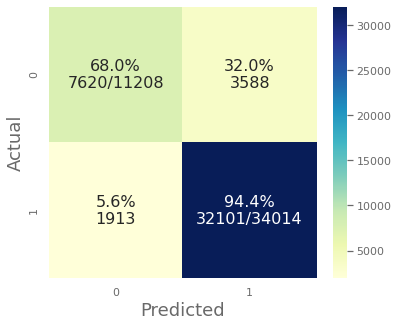

In [167]:
#thanks to @MECIT GUNGOR
def plot_cm(y_true, y_pred, figsize=(6,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y, lgb.predict(train))

## Now we try fitting a logistic regression model

In [45]:
# with capital gain/loss
clf2 = LogisticRegression(max_iter=5000, C=0.8).fit(train, y)
cv = cross_val_score(clf2,train, y, cv=4)
cv, cv.mean()

(array([0.84220768, 0.85255616, 0.84847413, 0.84688191]), 0.8475299698398451)

In [102]:
# with capital gain/loss / not balanced
clf2 = LogisticRegression(max_iter=5000, C=0.8)#.fit(train, y)
cv = cross_val_score(clf2,train, y, scoring='f1',cv=kf)
cv, cv.mean()

(array([0.90080246, 0.89878635, 0.90501199, 0.90276344]), 0.9018410607530857)

In [100]:
# with capital gain/loss and balanced
clf2 = LogisticRegression(max_iter=5000, C=0.8,class_weight="balanced").fit(train, y)
cv = cross_val_score(clf2,train, y,scoring='f1', cv=kf)
cv, cv.mean()

(array([0.86445821, 0.85513091, 0.86563373, 0.86044876]), 0.8614179049924189)

In [103]:
clf2.fit(train, y)

LogisticRegression(C=0.8, max_iter=5000)

In [117]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ',classifier.best_score_)
    print('Best Parameters: ' , classifier.best_params_)

In [119]:
lr = LogisticRegression(random_state=1)
param_grid = {'max_iter' : [5000],
              'penalty' : ['l1','l2']
              ,'solver' : ['liblinear']
              ,'C': np.linspace(0.01,2,20),
              'class_weight':[None,'balanced']
             }

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = kf, verbose = True, scoring = 'f1', n_jobs = -1)
best_clf_lr = clf_lr.fit(train,y)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 4 folds for each of 80 candidates, totalling 320 fits
Logistic Regression
Best Score:  0.9020071823822835
Best Parameters:  {'C': 1.7905263157894737, 'class_weight': None, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'liblinear'}


In [136]:
# wieght balance activated
y_pred = best_clf_lr.predict(train)
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66     11208
           1       0.88      0.93      0.90     34014

    accuracy                           0.85     45222
   macro avg       0.81      0.77      0.78     45222
weighted avg       0.84      0.85      0.84     45222

[[ 6780  4428]
 [ 2427 31587]]


### lgbm still has better performance than logistic regression model with gridsearch
### to furthur improve lgbm performance, we will hypertune lgbm model to best accuarcy

In [137]:
importance = clf2.coef_
importance = importance.tolist()[0]

### Feature score and importance for Logistic regression model (-ve means lower probability of low income)
#### Features that are most important are very similar to that of tree based model, proves result consistency

In [138]:
# with capital gain/loss
scores = pd.DataFrame({'Features':a,
        'score':importance})
scores.sort_values(['score'],key=abs,ascending=False).head(20)

,Features,score
2,capital-gain,-2.373547
30,marital-status_ Married-civ-spouse,-1.543127
29,marital-status_ Married-AF-spouse,-1.505457
65,native-country_ Columbia,1.359667
43,occupation_ Priv-house-serv,1.212660
54,relationship_ Wife,-1.048223
32,marital-status_ Never-married,1.019296
96,native-country_ South,1.013820
38,occupation_ Exec-managerial,-0.884911
39,occupation_ Farming-fishing,0.870404


In [178]:
scores = pd.DataFrame({'Features':a,
        'score':importance})
scores.sort_values(['score'],key=abs,ascending=False).head(20)

,Features,score
28,marital-status_ Married-civ-spouse,-1.495054
63,native-country_ Columbia,1.428380
27,marital-status_ Married-AF-spouse,-1.370986
41,occupation_ Priv-house-serv,1.151676
52,relationship_ Wife,-1.070397
30,marital-status_ Never-married,0.972596
36,occupation_ Exec-managerial,-0.908399
94,native-country_ South,0.901815
80,native-country_ Ireland,-0.839220
93,native-country_ Scotland,0.822678


## furthur investigations

In [127]:
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [123]:
def ctab(dataframe, target, column):
    tosort = df[target].unique()[0]
    tb0 = pd.crosstab(df[target], df[column], normalize='columns').T.sort_values(by=tosort,ascending=False) * 100.0
    totalc0 = df[df[column].isin(tb0.index)].groupby(column).size().reset_index(name='counts')
    return tb0.merge(totalc0, on=column)

In [124]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [125]:
ctab(df,'income','relationship')

,relationship,<=50K,>50K,counts
0,Own-child,98.415334,1.584666,6626
1,Other-relative,96.293551,3.706449,1349
2,Unmarried,93.692565,6.307435,4788
3,Not-in-family,89.506067,10.493933,11702
4,Husband,54.425158,45.574842,18666
5,Wife,51.410808,48.589192,2091


In [128]:
ctab(df,'income','education_level')

,education_level,<=50K,>50K,counts
0,Preschool,98.611111,1.388889,72
1,1st-4th,96.396396,3.603604,222
2,5th-6th,95.100223,4.899777,449
3,11th,94.502779,5.497221,1619
4,9th,94.378698,5.621302,676
5,7th-8th,93.317132,6.682868,823
6,10th,93.295176,6.704824,1223
7,12th,92.547660,7.452340,577
8,HS-grad,83.656903,16.343097,14783
9,Some-college,79.896959,20.103041,9899


In [131]:
ctab(df,'education_level','sex')

,sex,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,counts
0,Male,2.725456,3.482163,1.303764,0.543781,1.113768,2.050644,1.601861,3.020277,4.206113,17.165133,1.428244,33.157533,5.604874,0.170341,2.165296,20.260753,30527
1,Female,2.660769,3.783600,1.218101,0.381082,0.741749,1.340592,1.272542,3.980946,4.593399,15.855733,0.734944,31.718272,5.464444,0.136101,0.843824,25.273903,14695


In [215]:
#choose which metric accuracy or recall.. to choose class imbalance method
#cross validate because 